In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is. 

* Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

* This would be helpful if we are to train our model to take NLP inputs.


In [8]:
df = pd.read_csv('D:/DS/mindtree_updated.csv')
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change,Trend
0,1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,...,207011,1.061317e+08,5550,82090,39.65,1,5,2017,0.363137,Slight or No change
1,2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,...,391401,2.004375e+08,13341,150098,38.35,2,5,2017,-0.968120,Slight Negative
2,3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,...,852336,4.309377e+08,18513,170919,20.05,3,5,2017,-2.656265,Negative
3,4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,...,352273,1.748782e+08,8326,57853,16.42,4,5,2017,0.933252,Slight Positive
4,5,MINDTREE,EQ,2017-05-22,497.50,499.95,511.85,497.10,501.55,502.35,...,399974,2.018999e+08,9779,107089,26.77,5,5,2017,0.974874,Slight Positive


In [9]:
#Using the pandas_profiling function of pandas to obtain and extensive preiminary report
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,493
Total Missing (%),0.0%
Total size in memory,81.0 KiB
Average record size in memory,168.2 B
Numeric,7
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,12


In [10]:
df['Date'].dtype

dtype('O')

In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].dtype

dtype('<M8[ns]')

In [12]:
df.set_index('Date').head()

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-16,1,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,1,5,2017,0.363137,Slight or No change
2017-05-17,2,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,2,5,2017,-0.968120,Slight Negative
2017-05-18,3,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,3,5,2017,-2.656265,Negative
2017-05-19,4,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,4,5,2017,0.933252,Slight Positive
2017-05-22,5,MINDTREE,EQ,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,5,5,2017,0.974874,Slight Positive


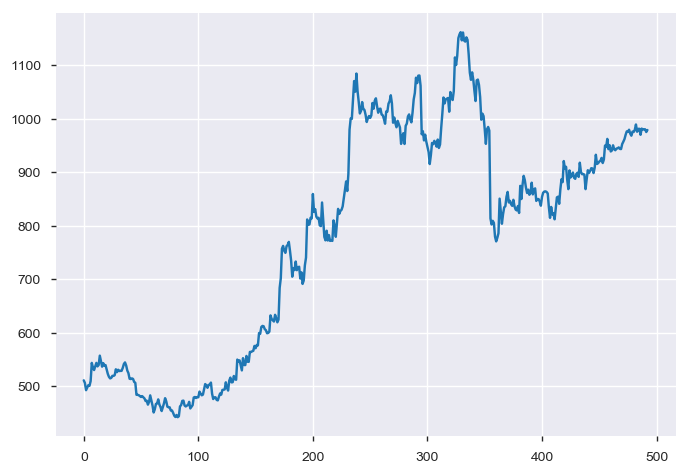

In [13]:
df['Close Price'].plot()
plt.show()

# Problem Statement 2.2

A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

In [63]:
date = df['Date']
dpc = df['Day_Perc_Change']
ttc = df['Total Traded Quantity']

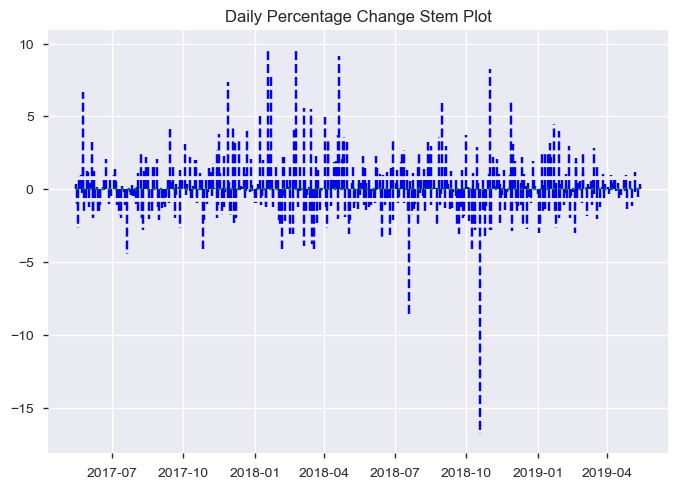

In [64]:
a = plt.stem(date, dpc, markerfmt = 'b ', linefmt = 'b--', basefmt = 'g:')
plt.title('Daily Percentage Change Stem Plot')
plt.show()

# Problem Statement 2.3

Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

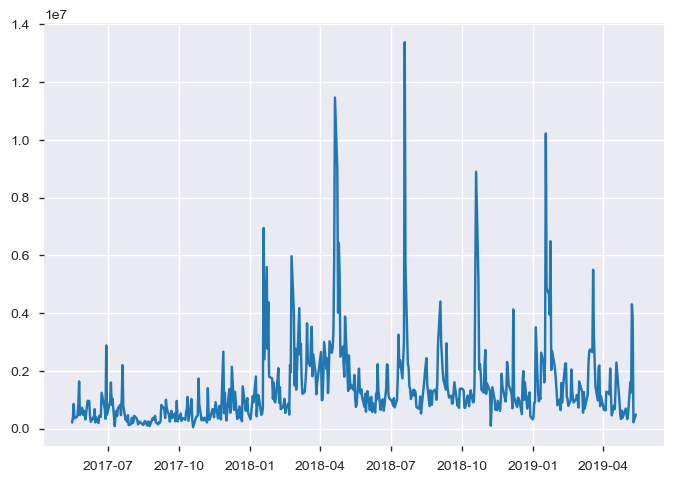

In [65]:
b = plt.plot(date, ttc)

In [91]:
x = df['Date']
y1 = df['Day_Perc_Change']
y2 = df['Total Traded Quantity']

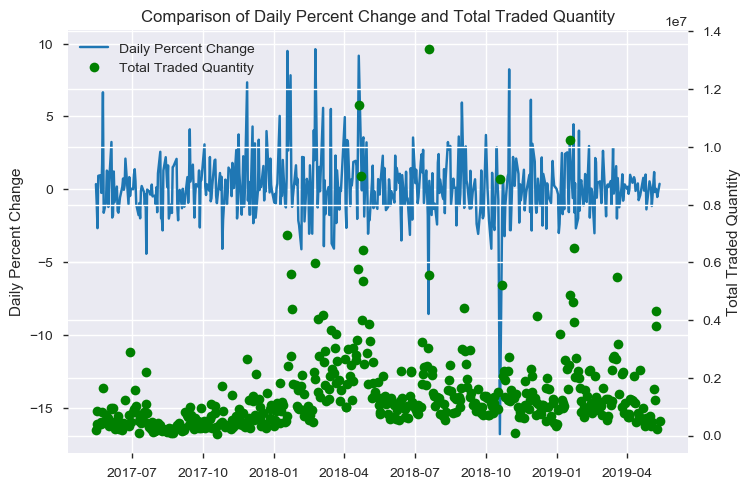

In [98]:
fig = plt.figure()
plt.title('Comparison of Daily Percent Change and Total Traded Quantity')
host = fig.add_subplot(111)
par = host.twinx() #to create a parralel y axis
host.set_ylabel('Daily Percent Change')
par.set_ylabel('Total Traded Quantity')


line1, = host.plot(x, y1)
line2, = par.plot(x, y2, 'go')
host.legend([line1, line2], ['Daily Percent Change', 'Total Traded Quantity'])
plt.show()

#plt.ylim(-1e7, 1e7)
#plt.stem(date, dpc, markerfmt = 'r', linefmt = 'r--', basefmt = 'g:')
#plt.plot(date, ttc, 'b', label = 'Total Traded Quantity')
#plt.show()